In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from entot.data.data import create_gaussians, create_gaussian_split
from entot.models.models import DiscreteOTModel, SeguyModel, SinkhornModel
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

In [2]:
n_x = 1000
n_y = 1000
x = np.linspace(-0.3, 1.2, n_x)
y = np.linspace(-0.5, 0.5, n_y)
xx, yy = np.meshgrid(x,y)

x_fl = xx.flatten()
y_fl = yy.flatten()

concat = jnp.transpose(jnp.concatenate((jnp.atleast_2d(x_fl), jnp.atleast_2d(y_fl)), axis=0))
concat.shape

(1000000, 2)

# Dataset 1

This notebook was generated *including* the sinkhorn divergence loss terms (API changed after)

In [3]:
source, target = create_gaussians(1000, 1000, var_source=0.2, var_target=0.2)

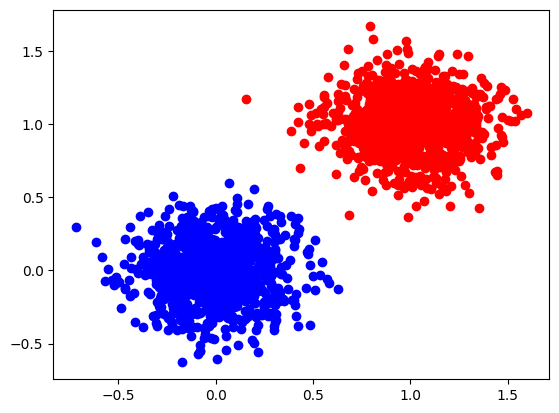

In [4]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")

In [5]:
sm = SinkhornModel(0.01, 512, 512, iterations=1000, input_dim=2)
sm(source, target)
#sm.learn_barycentric_projection(n_iters=1000)

100%|██████████| 1000/1000 [1:10:23<00:00,  4.22s/it]


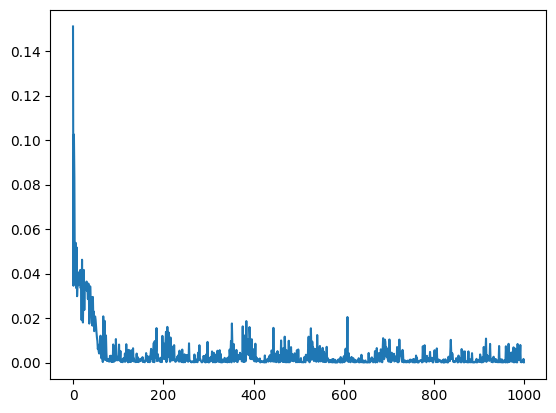

In [6]:
plt.plot(np.arange(len(sm.metrics["f"])), sm.metrics["f"])

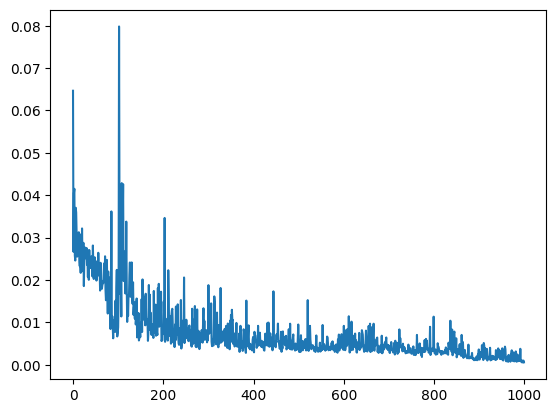

In [7]:
plt.plot(np.arange(len(sm.metrics["g"])), sm.metrics["g"])

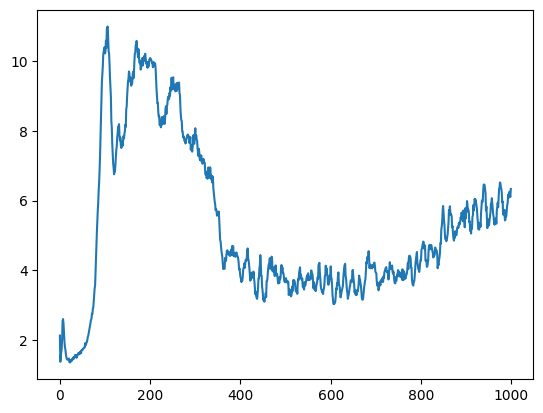

In [8]:
plt.plot(np.arange(len(sm.metrics["obj"])), sm.metrics["obj"])

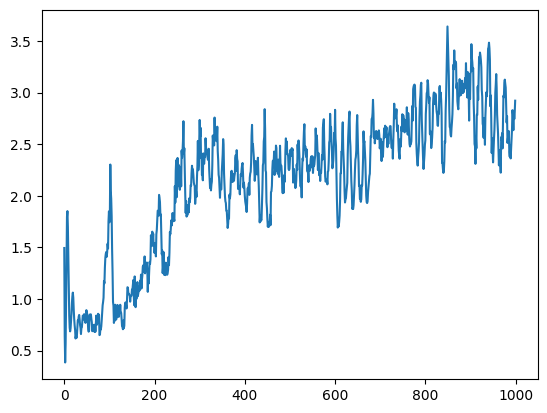

In [9]:
plt.plot(np.arange(len(sm.metrics["div_transported_source"])), sm.metrics["div_transported_source"])

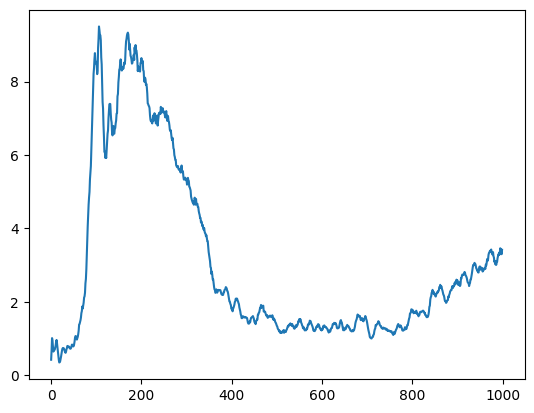

In [11]:
plt.plot(np.arange(len(sm.metrics["div_transported_target"])), sm.metrics["div_transported_target"])

In [12]:
transported = sm.transport()

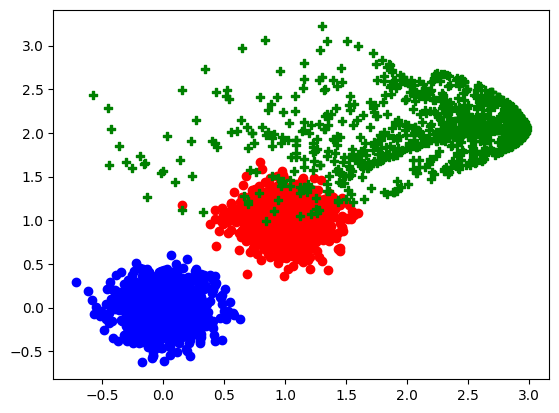

In [13]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(transported[:, 0], transported[:, 1], color="green", marker="P")